In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
# data cleaning and predictin how many people died and survived!
import numpy as np

In [3]:
titanic=pd.read_csv("titanic_train.csv")

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<Axes: >

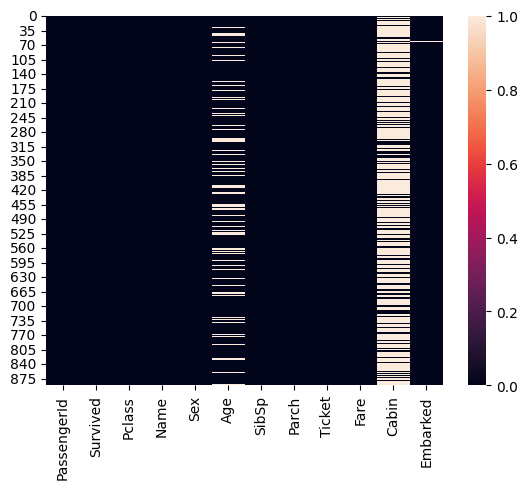

In [6]:
sb.heatmap(titanic.isnull())

In [7]:
#above data is having age and cabin null values.hence
titanic.Cabin

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [8]:
titanic.pop("Cabin")

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [9]:
#above data cabin is removed from the titanic variable.
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

<Axes: xlabel='Survived', ylabel='count'>

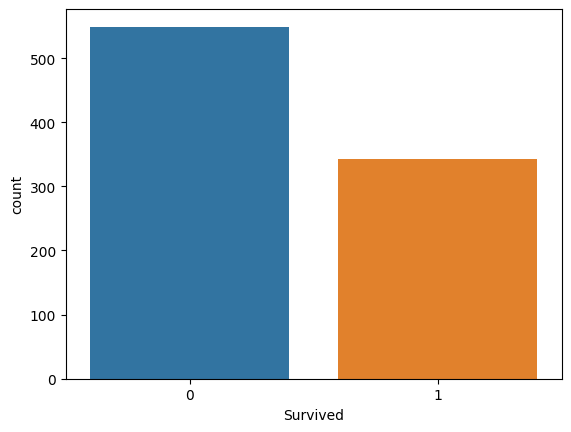

In [10]:
#data visualization for survival
sb.countplot(data=titanic,x="Survived")

<Axes: xlabel='Survived', ylabel='count'>

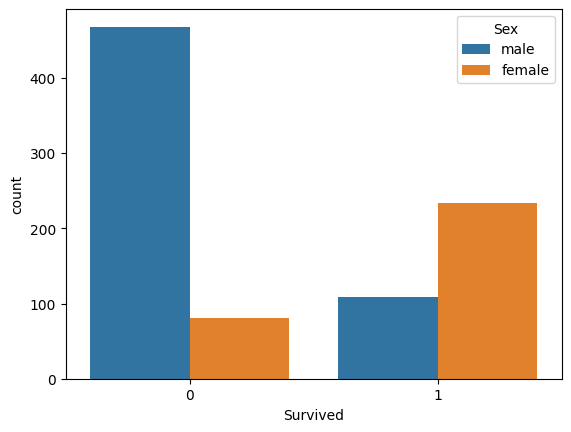

In [11]:
sb.countplot(data=titanic,x="Survived",hue="Sex")

<Axes: xlabel='Survived', ylabel='count'>

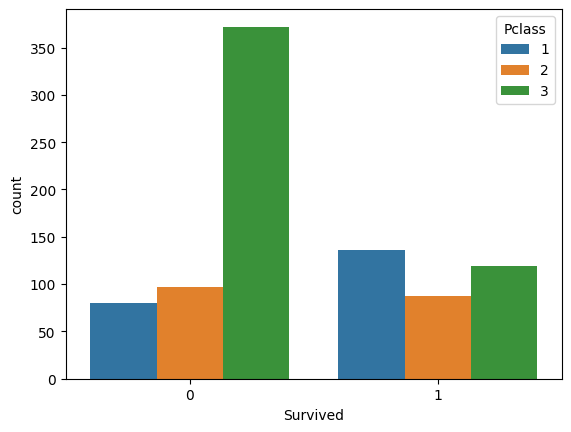

In [12]:
sb.countplot(data=titanic,x="Survived",hue="Pclass")

In [13]:
#class1 empty ages fill with mean age of class1 &do repeat for class2 & class3
titanic[titanic['Pclass']==1]['Age'].mean()

38.233440860215055

In [14]:
titanic[titanic['Pclass']==2]['Age'].mean()

29.87763005780347

In [15]:
titanic[titanic['Pclass']==3]['Age'].mean()

25.14061971830986

<Axes: xlabel='Pclass', ylabel='Age'>

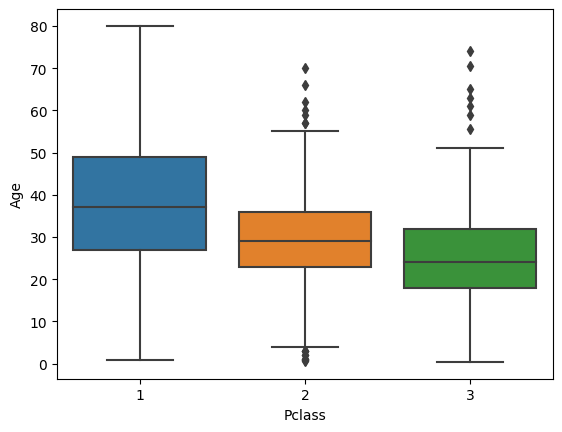

In [16]:
sb.boxplot(data=titanic,x="Pclass",y="Age")

In [17]:
#p1=38,p2=30,p3=25
#fill ages
def rm(col):
  Age=col[0]
  Pclass=col[1]
  if pd.isnull(Age):
    if Pclass==1:
      return 38
    elif Pclass==2:
      return 30
    else:
      return 25
  else:
      return Age

In [18]:
titanic[['Age','Pclass']]

,Age,Pclass
0,22.0,3
1,38.0,1
2,26.0,3
3,35.0,1
4,35.0,3
...,...,...
886,27.0,2
887,19.0,1
888,NaN,3
889,26.0,1


In [19]:
titanic['Age']=titanic[['Age','Pclass']].apply(rm,axis=1)

<Axes: >

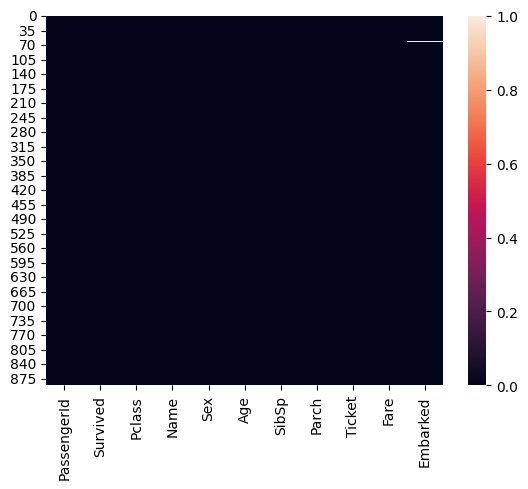

In [20]:
sb.heatmap(titanic.isnull())


In [21]:
titanic.dropna(inplace=True)#this line delete null values permanently

<Axes: >

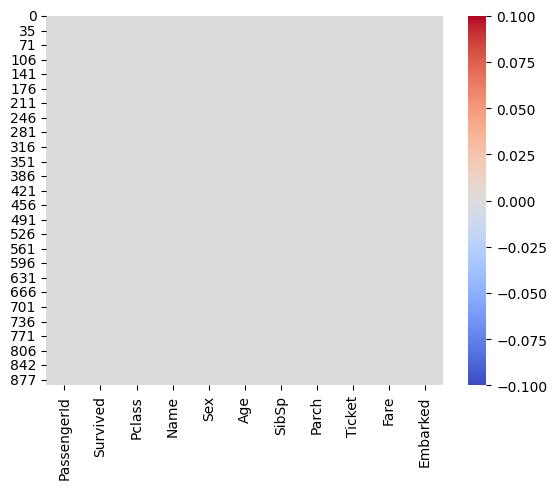

In [22]:
sb.heatmap(titanic.isnull(),cmap="coolwarm")

In [23]:
#above data is having no null values
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [24]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [25]:
#sex & embark to be converted to numbers
gender=pd.get_dummies(titanic['Sex'],drop_first=True)
gender

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [26]:
emb=pd.get_dummies(titanic['Embarked'])
emb

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [27]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [28]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [29]:
titanic.drop(['PassengerId', 'Name', 'Sex',
       'Ticket', 'Fare', 'Embarked'],axis=1,inplace=True)

In [30]:
titanic.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch'], dtype='object')

In [31]:
titanic=pd.concat([titanic,emb,gender],axis=1)

In [32]:
titanic.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'C', 'Q', 'S', 'male'], dtype='object')

In [72]:
X=titanic[['Pclass', 'Age', 'SibSp', 'Parch','Pclass', 'Q', 'S', 'male']]
y=titanic['Survived']

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
iit=LogisticRegression(random_state=0)
iit.fit(X,y)

LogisticRegression(random_state=0)

In [47]:
pred=print(iit.predict(X_test))

[1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1
 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 1
 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1]


In [48]:
print(y_test)

14     0
159    0
763    1
741    0
483    1
      ..
886    0
673    1
182    0
632    1
141    1
Name: Survived, Length: 178, dtype: int64


In [57]:
print(X.shape)

(889, 8)


In [81]:
import warnings
warnings.filterwarnings("ignore")

res=iit.predict([[3,1,1,2,3,4,1,3]])

if(res==42):
  print("so sorry!not Survived")
else:
  print("Survived")

Survived
